In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4995/project/project-deliverable-2/datos_merged_1986_2023.csv')
df

,Unnamed: 0.1,Unnamed: 0,track_id,track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,0,0,2A6yzRGMgSQCUapR2ptm6A,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,227600,False,4,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,1,1,3gKwVWwKmeuFtPubICbOGc,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,220840,False,9,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,2,2,2tY1gxCKslfXLFpFofYmJQ,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,157440,False,11,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,3,3,31dqpLUModJWNbxrXu6TWd,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,256293,False,9,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,4,4,00vYs0qZA40Z8AAaN7xmMO,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,1,184160,False,1,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11445,595,4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,214945,False,1,...,2.0,0.0915,-5.600,0.0,0.0493,122.104,4.0,0.498,2023,3.582417
11446,11446,596,7Lkxvfl2rkNYWS4kBDCQtN,Las Morras,81,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,155550,True,1,...,9.0,0.0706,-4.641,0.0,0.0407,133.007,3.0,0.901,2023,2.592500
11447,11447,597,6UoKX6uLJwhsnyTp5k5StP,The Painter,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,211413,False,1,...,2.0,0.1070,-5.766,1.0,0.0329,97.981,4.0,0.261,2023,3.523550
11448,11448,598,4ZYAU4A2YBtlNdqOUtc7T2,Red Ruby Da Sleeze,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,214445,True,1,...,1.0,0.1110,-6.181,1.0,0.2560,98.355,4.0,0.292,2023,3.574083


In [ ]:
#df.info

In [ ]:
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   track_id                    11450 non-null  object 
 1   track_name                  11450 non-null  object 
 2   popularity                  11450 non-null  int64  
 3   available_markets           11449 non-null  object 
 4   disc_number                 11450 non-null  int64  
 5   duration_ms                 11450 non-null  int64  
 6   explicit                    11450 non-null  bool   
 7   track_number                11450 non-null  int64  
 8   href                        11450 non-null  object 
 9   album_id                    11450 non-null  object 
 10  album_name                  11450 non-null  object 
 11  album_release_date          11450 non-null  object 
 12  album_type                  11450 non-null  object 
 13  album_total_tracks          114

## value counts: categorical data or discrete numerical data

In [ ]:
df['disc_number'].value_counts()

In [ ]:
df['explicit'].value_counts()

In [ ]:
df['track_number'].value_counts()

In [ ]:
df['album_type'].value_counts()

In [ ]:
df['album_total_tracks'].value_counts()

In [ ]:
df['key'].value_counts()

In [ ]:
df['mode'].value_counts()

In [ ]:
df['time_signature'].value_counts()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

df.popularity.plot.hist(bins=20,ax=ax);
ax.set_xlabel('popularity');
ax.set_title('popularity of songs of initial dataset');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

df.instrumentalness.plot.hist(bins=100,ax=ax);
ax.set_xlabel('instrumentalness');
ax.set_title('instrumentalness of songs of initial dataset');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

df.principal_artist_followers.plot.hist(bins=100,ax=ax);
ax.set_xlabel('principal_artist_followers');
ax.set_title('principal_artist_followers of songs of initial dataset');


## drop missing and unuseful columns

In [ ]:
missing=pd.DataFrame({'Percentage of missing':df.isna().sum()*100/len(df)})
fig,ax=plt.subplots(1,1,figsize=(12,4))
plt.scatter(x=missing.index,y=missing['Percentage of missing']);
ax.set_title('Percentage of missing data');
ax.set_xlabel('Feature');
ax.set_ylabel('Percentage(%)');
ax.tick_params(axis='x',rotation=90)

In [ ]:
df_full=df.dropna()

In [ ]:
df_full=df_full.reset_index(drop=True)

In [ ]:
df_full

## Data cleaning

In [ ]:
df_X = df_full.drop(columns=['popularity'])
df_y = df_full['popularity']

#### ohe

In [ ]:
ohe_features=['explicit','album_type']
ohe=OneHotEncoder(drop='first')
df_transformed=ohe.fit_transform(df_X[ohe_features])
#ohe.get_feature_names()
df_transformed=pd.DataFrame(df_transformed.toarray())
df_transformed.columns=ohe.get_feature_names_out()
df_X=pd.concat([df_X,df_transformed],axis=1)
df_X=df_X.drop(columns=ohe_features)

In [ ]:
df_X.select_dtypes(include=['object']).keys()

Index(['available_markets', 'album_type', 'artists_names', 'artist_genres'], dtype='object')

#### ordinal encoding

In [ ]:
categorical_cols = ['explicit','album_type']
#Ordinal Encoding
encoder = OrdinalEncoder()
df_X[categorical_cols] = encoder.fit_transform(df_X[categorical_cols])

#### drop unuseful columns

In [ ]:
dropcol=['track_id','analysis_url','href','track_name','album_id','album_name','artists_ids','principal_artist_id',
'principal_artist_name','duration_ms','album_release_date','time_signature']
df_X=df_X.drop(columns=dropcol)

#### convert to log

In [ ]:
eps = 0.001
df_X['Log_principal_artist_followers'] = np.log(df_X.pop('principal_artist_followers') + eps)
df_X['Log_instrumentalness'] = np.log(df_X.pop('instrumentalness') + eps)

#### count number

In [ ]:
def countnumber(string):
    counts=string.split(';')
    count=len(counts)
    return count

In [ ]:
df_X['markets_count'] = df_X['available_markets'].apply(lambda x: countnumber(x) if pd.isna(x) == False else 0)
df_X['artist_count'] = df_X['artists_names'].apply(lambda x: countnumber(x) if pd.isna(x) == False else 0)
df_X['genres_count'] = df_X['artist_genres'].apply(lambda x: countnumber(x) if pd.isna(x) == False else 0)

In [ ]:
drop_cols = df_X.select_dtypes(include=['object']).keys()
df_X=df_X.drop(columns=drop_cols)

#### final data

In [ ]:
column_names = df_X.columns #.tolist()
print(column_names)

Index(['disc_number', 'explicit', 'track_number', 'album_type',
       'album_total_tracks', 'acousticness', 'danceability', 'energy', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'year', 'duration_min', 'Log_principal_artist_followers',
       'Log_instrumentalness', 'markets_count', 'artist_count',
       'genres_count'],
      dtype='object')


In [ ]:
df_X.select_dtypes(include=['object']).keys()

Index([], dtype='object')

In [ ]:
df_X.head(1)

,disc_number,explicit,track_number,album_type,album_total_tracks,acousticness,danceability,energy,key,liveness,...,speechiness,tempo,valence,year,duration_min,Log_principal_artist_followers,Log_instrumentalness,markets_count,artist_count,genres_count
0,1,0.0,4,0.0,10,0.701,0.397,0.207,0.0,0.116,...,0.0331,171.282,0.268,1986,3.793333,14.696082,-6.877517,184,1,4


In [ ]:
df_y.value_counts()

### data exploration

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

df_full.popularity.plot.hist(bins=20,ax=ax);
ax.set_xlabel('popularity');
ax.set_title('popularity of songs');

### Data visualization

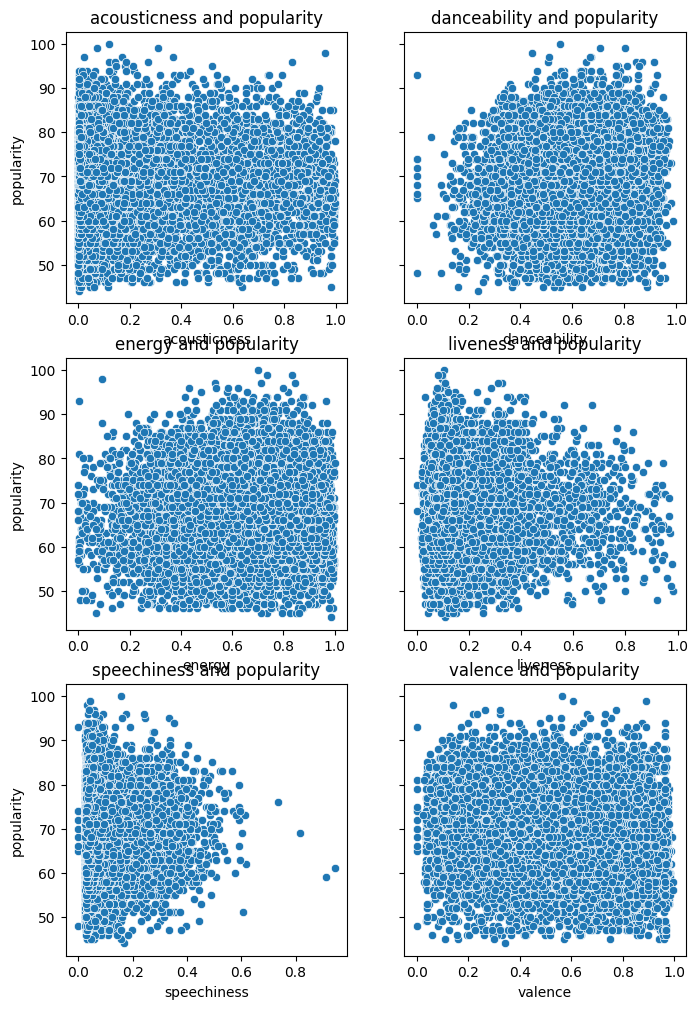

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(8,12),sharey=True)

sns.scatterplot(x=df_full['acousticness'],y=df_full['popularity'],ax=ax[0][0]);
ax[0][0].set_xlabel('acousticness');ax[0][0].set_ylabel('popularity');
ax[0][0].set_title("acousticness and popularity");

sns.scatterplot(x=df_full['danceability'],y=df_full['popularity'],ax=ax[0][1]);
ax[0][1].set_xlabel('danceability');ax[0][1].set_ylabel('popularity');
ax[0][1].set_title("danceability and popularity");

sns.scatterplot(x=df_full['energy'],y=df_full['popularity'],ax=ax[1][0]);
ax[1][0].set_xlabel('energy');ax[1][0].set_ylabel('popularity');
ax[1][0].set_title("energy and popularity");

sns.scatterplot(x=df_full['liveness'],y=df_full['popularity'],ax=ax[1][1]);
ax[1][1].set_xlabel('liveness');ax[1][1].set_ylabel('popularity');
ax[1][1].set_title("liveness and popularity");

sns.scatterplot(x=df_full['speechiness'],y=df_full['popularity'],ax=ax[2][0]);
ax[2][0].set_xlabel('speechiness');ax[2][0].set_ylabel('popularity');
ax[2][0].set_title("speechiness and popularity");

sns.scatterplot(x=df_full['valence'],y=df_full['popularity'],ax=ax[2][1]);
ax[2][1].set_xlabel('valence');ax[2][1].set_ylabel('popularity');
ax[2][1].set_title("valence and popularity");

In [ ]:
newDataFrame= df['artists_names'].value_counts()[:15]
artist_count = newDataFrame.reset_index()
artist_count.columns = ['Artist', 'Song count']
print(artist_count)

            Artist  Song count
0     Taylor Swift         184
1   Los Temerarios          62
2        Metallica          55
3            Drake          54
4       Zach Bryan          43
5       Kanye West          43
6         Deftones          42
7          Nirvana          42
8           Eminem          40
9      Luis Miguel          37
10     Linkin Park          37
11    Lana Del Rey          36
12          Bronco          35
13       Radiohead          35
14     $uicideboy$          34


<Axes: xlabel='Artist', ylabel='Song count'>

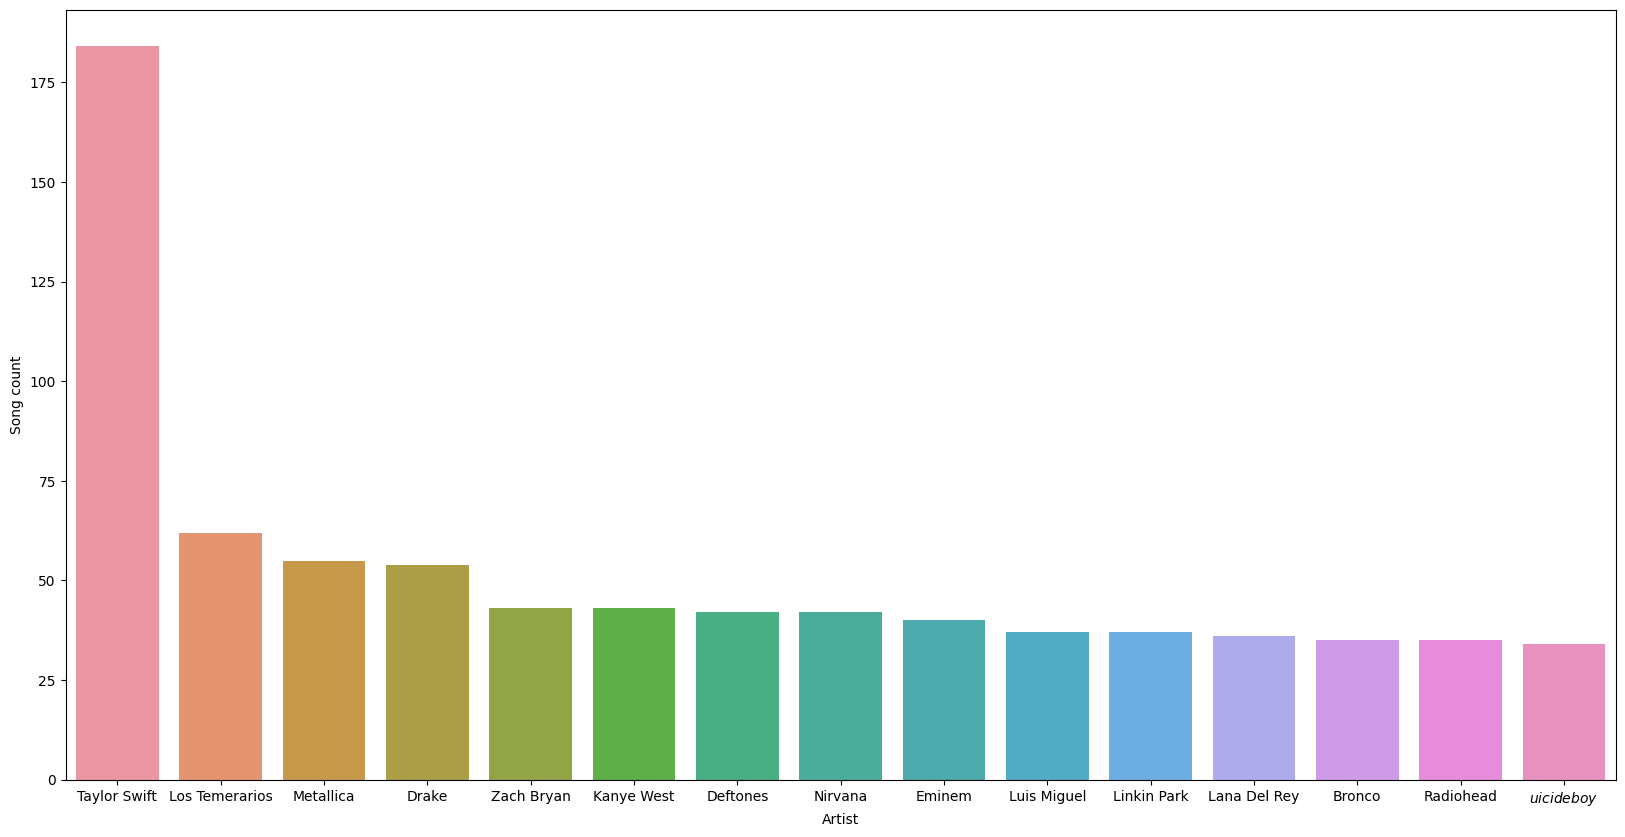

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(artist_count, x = "Artist", y = "Song count")

In [ ]:
newDataFrame= df['year'].value_counts()[:15]
year_count = newDataFrame.reset_index()
year_count.columns = ['Year', 'Song Count']
print(year_count)

    Year  Song Count
0   1990         600
1   1986         300
2   2014         300
3   2007         300
4   2008         300
5   2009         300
6   2010         300
7   2011         300
8   2012         300
9   2013         300
10  2015         300
11  1987         300
12  2016         300
13  2017         300
14  2018         300


([<matplotlib.patches.Wedge at 0x79bccf53f4f0>,
 [Text(1.0162674857624154, 0.4209517756015988, '1990'),
  Text(0.6111272563215626, 0.9146165735327998, '1986'),
  Text(0.21459935421774118, 1.0788638084435536, '2014'),
  Text(-0.21459935421774104, 1.0788638084435536, '2007'),
  Text(-0.6111272563215622, 0.9146165735328001, '2008'),
  Text(-0.9146165735327999, 0.6111272563215624, '2009'),
  Text(-1.0788638084435536, 0.21459935421774148, '2010'),
  Text(-1.0788638084435536, -0.2145993542177412, '2011'),
  Text(-0.9146165735328001, -0.6111272563215622, '2012'),
  Text(-0.6111272563215624, -0.9146165735327998, '2013'),
  Text(-0.21459935421774154, -1.0788638084435533, '2015'),
  Text(0.21459935421774115, -1.0788638084435536, '1987'),
  Text(0.6111272563215621, -0.9146165735328001, '2016'),
  Text(0.9146165735327998, -0.6111272563215624, '2017'),
  Text(1.0788638084435533, -0.21459935421774162, '2018')],
 [Text(0.5543277195067721, 0.22961005941905385, '12%'),
  Text(0.33334213981176136, 0.498

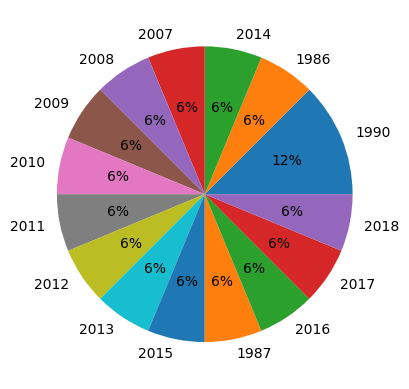

In [ ]:
plt.pie(year_count['Song Count'], labels = year_count['Year'], autopct='%.0f%%')


In [ ]:
year_count['Song Count']

0     600
1     300
2     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
14    300
Name: Song Count, dtype: int64

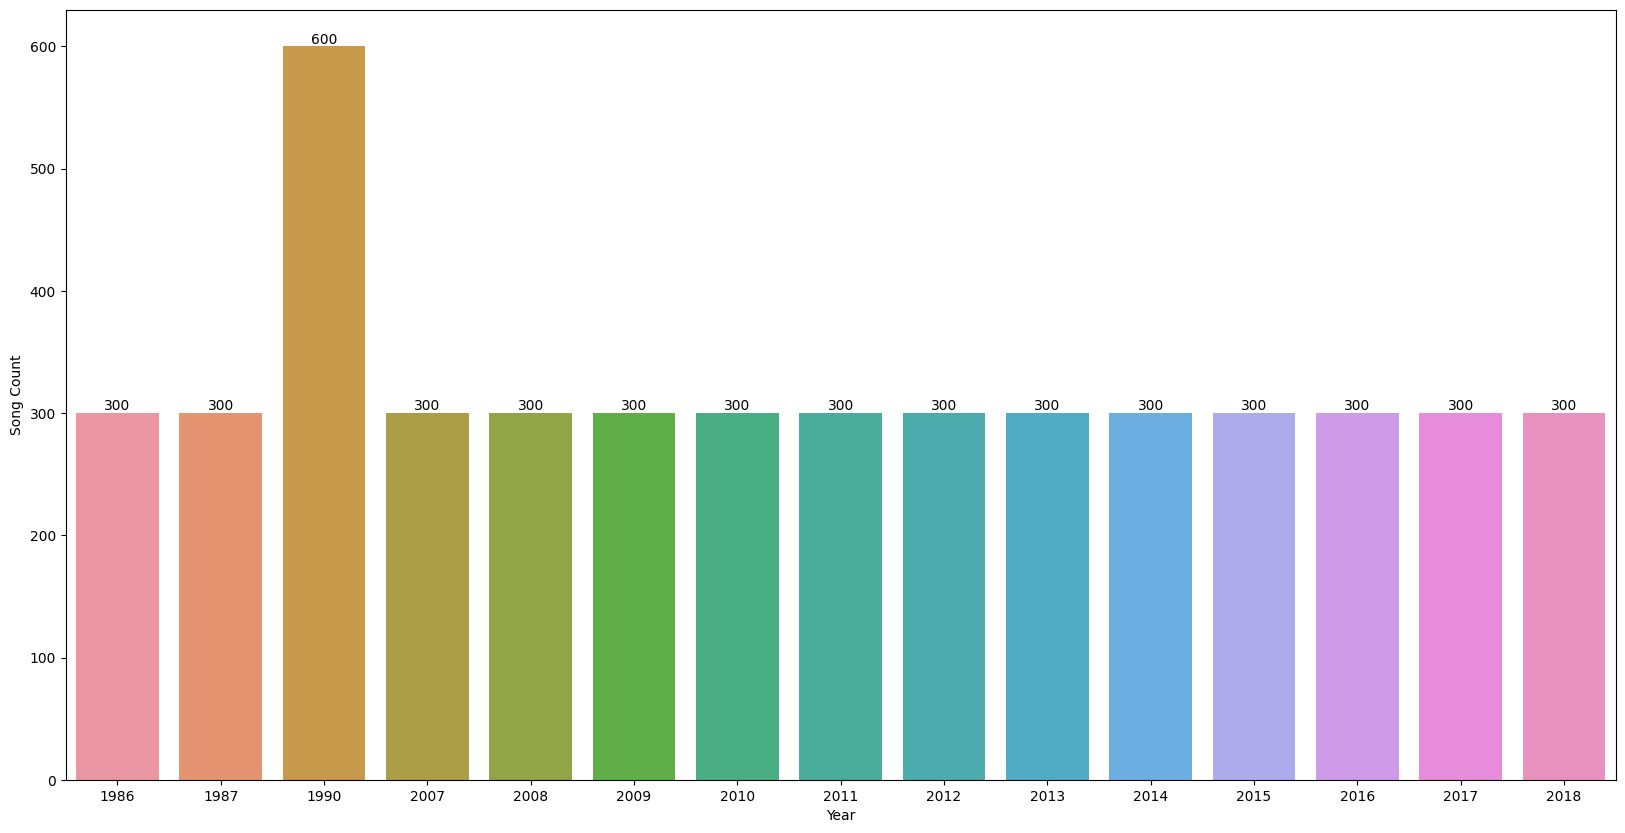

In [ ]:
plt.figure(figsize=(20,10))

ax = sns.barplot(year_count, x = "Year", y = "Song Count")
ax.bar_label(ax.containers[0], fontsize=10);


In [ ]:
newDataFrame = df['album_total_tracks'].value_counts()
genre_count = newDataFrame.reset_index()
genre_count.columns = ['Total Tracks', 'Number of Album Count']
print(genre_count)

    Total Tracks  Number of Album Count
0             12                   1548
1             10                   1333
2             11                   1127
3             13                   1046
4             14                    934
..           ...                    ...
73            72                      1
74            97                      1
75           104                      1
76            58                      1
77           101                      1

[78 rows x 2 columns]


In [ ]:
albulmCount = genre_count.sort_values(by = ['Total Tracks']) [:15]

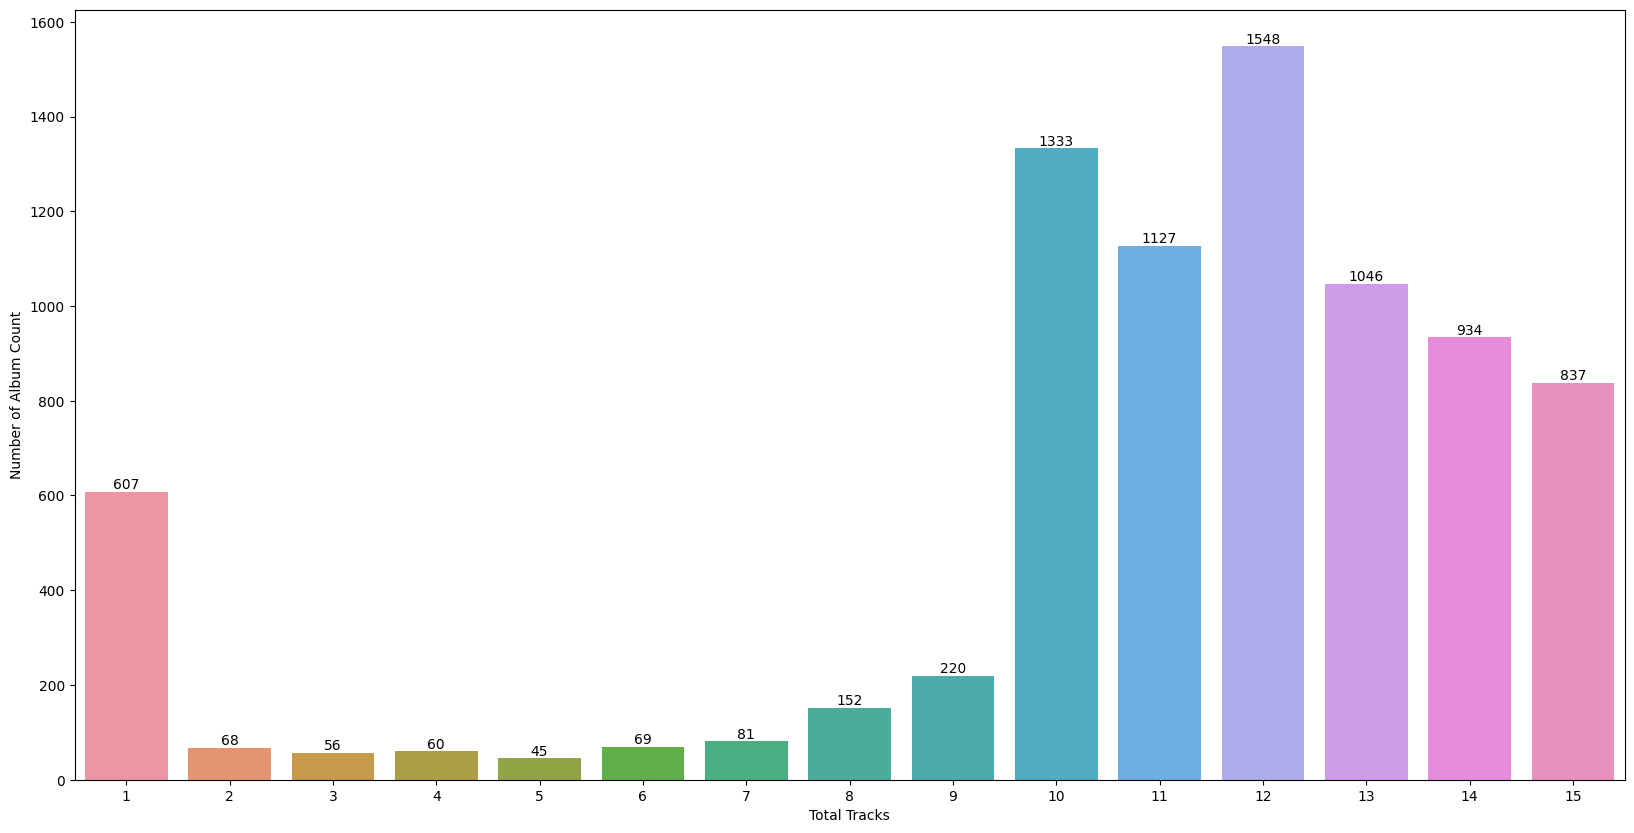

In [ ]:
plt.figure(figsize=(20,10))

ax = sns.barplot(albulmCount, x = "Total Tracks", y = "Number of Album Count")
ax.bar_label(ax.containers[0], fontsize=10);

([<matplotlib.patches.Wedge at 0x79bccbc025f0>,
 [Text(1.0702663377247308, 0.2540274912943337, '1'),
  Text(0.96943446253836, 0.5198046006365866, '2'),
  Text(0.9435998341827344, 0.5653488771814413, '3'),
  Text(0.9174951287417691, 0.6067970737694149, '4'),
  Text(0.8922956210485758, 0.6432795074130191, '5'),
  Text(0.8632960289172812, 0.681703723369363, '6'),
  Text(0.8226289882431697, 0.7302612872814903, '7'),
  Text(0.7541032057330264, 0.8008297915931781, '8'),
  Text(0.6324418567974377, 0.9000096098212559, '9'),
  Text(0.017947336219107102, 1.0998535780378398, '10'),
  Text(-0.8805435768539253, 0.6592746083850761, '11'),
  Text(-1.0197668576072931, -0.412402177644283, '12'),
  Text(-0.20840892405794526, -1.0800767196699548, '13'),
  Text(0.5931698650983704, -0.9263635955385883, '14'),
  Text(1.0436948290513839, -0.3474206439050542, '15')],
 [Text(0.583781638758944, 0.13856044979690926, '7%'),
  Text(0.5287824341118327, 0.28352978216541086, '1%'),
  Text(0.5146908186451278, 0.308372

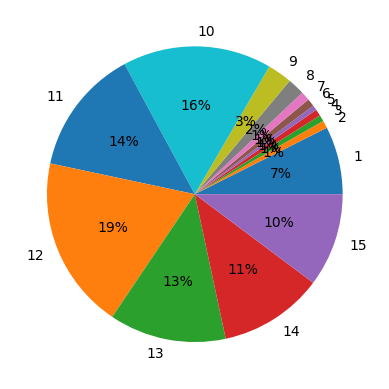

In [ ]:
plt.pie(albulmCount['Number of Album Count'], labels = albulmCount['Total Tracks'], autopct='%.0f%%')

In [ ]:
genres_count

## save data

In [ ]:
results_df = pd.concat([df_X, df_y], axis=1)

In [ ]:
results_df.head(1)

,disc_number,explicit,track_number,album_type,album_total_tracks,acousticness,danceability,energy,key,liveness,...,tempo,valence,year,duration_min,Log_principal_artist_followers,Log_instrumentalness,markets_count,artist_count,genres_count,popularity
0,1,0.0,4,0.0,10,0.701,0.397,0.207,0.0,0.116,...,171.282,0.268,1986,3.793333,14.696082,-6.877517,184,1,4,73


In [ ]:
results_df.shape

(11327, 23)

In [ ]:
root = "/content/drive/MyDrive/4995/project/project-deliverable-2/"
results_df.to_csv(root + 'data_after_cleaning.csv', index=False)